# Derivation
Assume $r=h(y)$ in that the rate of growth must fluctuate and cannot remain constant. $$\frac{dy}{dt}=h(y)y$$

We're looking for $h(y)\cong r\gt0$ when $y$ is small, $h(y)$ decreases as $y$ gets large, and when a boundary is met $h(y)\lt0$. 

$h(y)=(r-ay)$ sattifies these conditions, and letting $k=\frac{r}{a}$ we get $$\frac{dy}{dt}=r(1-\frac{y}{K})y$$

## Solution

$$\frac{dy}{(1-\frac{y}{y})y}=rdt\quad\Rightarrow\quad \int\frac{dy}{(1-\frac{y}{K})}=\int rdt \\
Using\;Partial\;Fractions\\
\int(\frac{1}{y}+\frac{\frac{1}{K}}{1-\frac{y}{K}})dy=rt+C\quad\Rightarrow\quad\frac{\ln(y)}{\ln(1-\frac{y}{K})}=rt+C\quad\Rightarrow\quad\frac{y}{1-\frac{y}{K}}=Ce^{rt}
$$

To satisfy we need to find $C$ for $y(0)=y_0$. Plugging in for $t=0$ we find $C=\frac{y_0}{1-\frac{y_0}{K}}$

We then solve for $y(t)$:

$$y=Ce^{rt}(1-\frac{y}{K})\quad\Rightarrow\quad y=Ce^{rt}-\frac{y}{K}Ce^{rt}\quad\Rightarrow\quad yK=Ce^{rt}K-Ce^{rt}\frac{y}{K}\\
\Rightarrow yK+Ce^{rt}\frac{y}{K}=Ce^{rt}K\quad\Rightarrow\quad y(K+\frac{Ce^{rt}}{K})=Ce^{rt}K\quad\Rightarrow\quad y(t)=\frac{Ce^{rt}K}{K+\frac{Ce^{rt}}{K}}
$$

Expanding $C$ out to finalize our equation:

$$y(t)=\frac{y_0e^{rt}K}{(1-\frac{y_0}{K})K+y_0e^{rt}}\quad\Rightarrow\quad \frac{y_0e^{rt}K}{(K-y_0)+y_0e^{rt}}\frac{e^{-rt}}{e^{-rt}}$$

Finally:

$$Logistic\;Equation\\
y(t)=\frac{y_0K}{y_0+(K-y_0)e^{-rt}}$$

Taking the limit $t\rightarrow\infty$:
$$\lim_{t\to\infty}Logistic\;Eq=\frac{y_0K}{y_0}=K$$


## Meaning

This means we can say that $\phi(t)=K$ is an asymptotically stable solution. Basically after a long time, the population $y$ will be close to the saturation level $K$ or, $y=K$, regardless of the initial population, provided that population is positive. If we instead use the other critical point $y=\phi(t)=0$, we call that Unstable equilibrium solution. In otherwords, the only way to ensure the population stays near zero, is to keep $y=0$. 

# Example 1

The logistic model has been applied to the natural growth of the halibut population in certain
areas of the Pacific Ocean. Let $m$, measured in kilograms, be the total mass, or biomass, of
the halibut population at time $t$. The parameters in the logistic equation are estimated to have
the values $r=0.71/year$ and $K=80.5×10^6kg$. If the initial biomass is $m_0=0.25K$, find the
biomass $2$ years later. Also find the time $t$ for which $m(t)=0.75K$.

## Solution

We can compute this with a simple definition and we will, but having an algebraic answer is also good here. 
$$ m(t)=\frac{m_0K}{m_0+(K-m_0)e^{-rt}}\quad\Rightarrow\quad m(2)\approx ?$$

(b) Start by moving our saturation value across the eq:
$$\frac{m(t)}{K}=\frac{\frac{m_0}{K}}{\frac{m_0}{K}+(1-\frac{m_0}{K})e^{-rt}}$$

Rearrange to get:

$$t=-\frac{1}{r}\ln{\frac{\frac{m_0}{K}(1-\frac{m}{K})}{\frac{m}{K}(1-\frac{m_0}{K})}}$$

m(2)=4.67e+07kg
t=3.095 years


Text(0.5, 0, 'Time(years)')

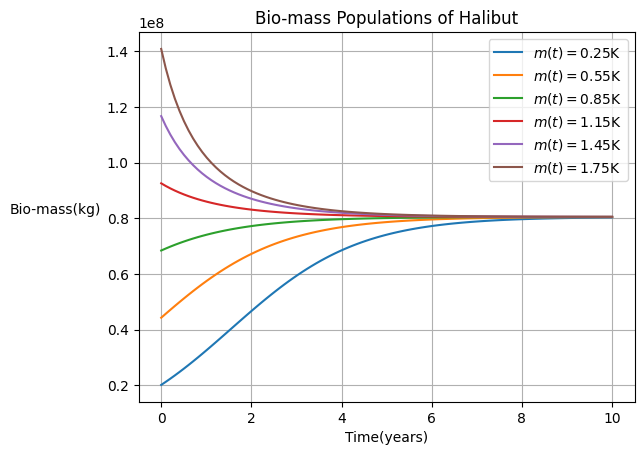

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def fish_population(init_bio_mass, saturation, rate, time):
    return (init_bio_mass*saturation)/(init_bio_mass+(saturation-init_bio_mass)*np.exp(-rate*time))

def time_to_population(init_bio_mass, saturation, rate, population_mass):
    return -1/rate*np.log((init_bio_mass/saturation*(1-population_mass/saturation))/(population_mass/saturation*(1-init_bio_mass/saturation)))

r=0.71
k=8.05e7
m_0=0.25*k

two_year_mass=fish_population(m_0, k, r, 2)    
print(f"m(2)={two_year_mass:.2e}kg")

m_i=0.75*k

year=time_to_population(m_0, k, r, m_i)
print(f"t={year:.3f} years")

# Model this for various initial bio-masses
m_init=np.linspace(0.25*k, 1.75*k, 6)

time=np.linspace(0,10,100)

for m in m_init:
    plt.plot(time, fish_population(m, k, r, time), label=rf"$m(t)=${m/k}K")
plt.legend()
plt.grid()
plt.title(label="Bio-mass Populations of Halibut")
plt.ylabel("Bio-mass(kg)", rotation=0, ha='right')
plt.xlabel("Time(years)")